##### 1. 

##### (i) Given the difference between the Mergers and acquisitions context in Europe and US, Kusha must make Significant changes to her headcount reduction approach from her previous consulting experience in Chicago. Where the process of headcount reduction works differently and, if implemented here, can lead to employee revolts and a high degree of investigation, being there is greater scrutiny of wrongful termination in Europe, it is doubtful that a firm gets regulatory approval for terminating employees over the reason of acquisition.  

##### Previously kusha typically followed a standard procedure to formulate a headcount reduction strategy, under which she and her team would meet the seniors and act upon the factors that they considered to evaluate the employee's intention to stay and considering other elements from the employee census to arrive at a conclusion based on considering both evaluations and deliver a cumulative response to offer a termination. But now, with acquiring SFB, kusha must make the decision entirely data-driven considering many factors to shortlist the employee groups to whom the RCC's must be provided, instead of targeting specific employees to comply with the French regulations. Kusha must make sure that the model to size down the employee count should not get influenced by favoritism and must ultimately act on the results obtained by analyzing the data from the employee census files. Also, keep in mind that the data used for decision making must not conclude results based on Gender or discrimination among distinct groups.  

##### (ii) There was a mishap during the previous transaction of an acquisition, which led to many employees leaving the company and having to do quick external recruitment right after the deal closed, which was mainly because the RCC's were offered to every employee in the company without any prior data analysis which is why a data-driven approach is necessary to avoid the mass exodus of employees. The employee census of the previous closure can be used to train a logistic regression model, which then should be tested on the Lyon employee census to predict the probability of each employee accepting an RCC if offered. Following that the employee Categories can be decided, keeping in mind that they are not too much sized down, which might represent discrimination, the RCC's can then be offered to the employee categories, which will make the process fair and per the French regulations, also helping BAP achieve its reduction targets without too many employees leaving. 

### Part 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


## Data Preprocessing

In [3]:
prev_census = pd.read_csv('employee_census_previous_closure.csv')
prev_census

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,No,Travel_Rarely,750.0,Research & Development,28.0,3,Life Sciences,1,1596,...,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,Travel_Rarely,447.0,Research & Development,NaN,3,Life Sciences,1,1814,...,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,Travel_Frequently,1256.0,Research & Development,NaN,4,Life Sciences,1,1203,...,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,Travel_Rarely,1378.0,Research & Development,13.0,2,Other,1,2053,...,1,80,1,10,2,3,4,3,0,3


In [4]:
prev_census.isna().any()

Age                          True
Attrition                   False
BusinessTravel               True
DailyRate                    True
Department                  False
DistanceFromHome             True
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus                True
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [5]:
prev_census = prev_census.dropna(axis=0,how ='any')
prev_census = prev_census.reset_index()

In [6]:
prev_census.duplicated().any()

False

In [7]:
prev_census.nunique()
unique = [i  for i in list(prev_census) if prev_census[i].nunique()<=1]
prev_census = prev_census.drop(columns=unique)

In [8]:
gender = {'Male': 1, 'Female': 0}
attrition= {'Yes': 1, 'No': 0}
overtime = {'Yes': 1, 'No': 0}
prev_census.Gender = [gender[item] for item in prev_census.Gender]
prev_census.Attrition = [attrition[item] for item in prev_census.Attrition]
prev_census.OverTime = [overtime[item] for item in prev_census.OverTime]


In [9]:
catcols = prev_census[['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']]
encoder = OrdinalEncoder()
dfnew = encoder.fit_transform(catcols)  # transform data
prev_census_new = pd.DataFrame(data = dfnew)


In [10]:
prev_census_new.columns = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
prev_census[['BusinessTravel', 'Department', 'EducationField', 'JobRole','MaritalStatus']] = prev_census_new[['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']]


In [11]:
prev_census = prev_census.drop('index',axis=1)

In [12]:
prev_census_new

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,2.0,1.0,3.0,5.0,0.0
1,2.0,1.0,3.0,4.0,0.0
2,2.0,2.0,2.0,8.0,2.0
3,2.0,1.0,1.0,0.0,2.0
4,2.0,1.0,3.0,3.0,1.0
...,...,...,...,...,...
770,2.0,2.0,1.0,3.0,1.0
771,0.0,2.0,2.0,7.0,1.0
772,2.0,1.0,1.0,2.0,1.0
773,2.0,1.0,4.0,2.0,1.0


In [13]:
prev_census[['MonthlyIncome','MonthlyRate','DailyRate','HourlyRate','PercentSalaryHike']] = StandardScaler(
).fit_transform(prev_census[['MonthlyIncome', 'MonthlyRate', 'DailyRate', 'HourlyRate', 'PercentSalaryHike']])


Correlation matrix is : 
                               Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.172057        0.047119   0.046299   
Attrition                -0.172057   1.000000        0.037544  -0.033084   
BusinessTravel            0.047119   0.037544        1.000000  -0.013387   
DailyRate                 0.046299  -0.033084       -0.013387   1.000000   
Department               -0.041584   0.055414       -0.025418  -0.001529   
DistanceFromHome         -0.022593   0.045463       -0.077346  -0.031727   
Education                 0.226617  -0.020911        0.013011  -0.063184   
EducationField           -0.022388   0.064709        0.020412   0.056257   
EmployeeNumber           -0.021116   0.010733        0.002791  -0.039497   
EnvironmentSatisfaction  -0.020728  -0.094650       -0.007501  -0.002455   
Gender                   -0.003659   0.047417       -0.032678  -0.004436   
HourlyRate               -0.007562   0.024982        0.028031  

/var/folders/fm/93jxmmqx3l39zftvbd19fc9r0000gn/T/ipykernel_28592/267858252.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(matrix, dtype=np.bool))


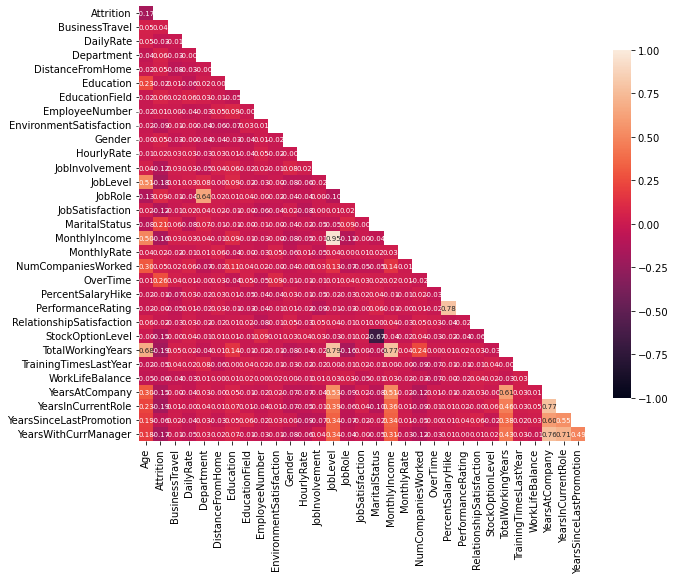

In [14]:
matrix = prev_census.corr()

print("Correlation matrix is : ")

print(matrix)

fig, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(matrix, dtype=np.bool))

mask = mask[1:, :-1]
corr = matrix.iloc[1:, :-1].copy()
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", vmin=-1,vmax=1, cbar_kws={"shrink": .8}, annot_kws={"size": 7})
plt.yticks(rotation=0)
plt.show()


In [15]:
prev_census

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,0,2.0,0.826692,1.0,1.0,2,3.0,997,4,...,4,3,1,32,1,2,5,4,1,3
1,36.0,0,2.0,-1.388337,1.0,6.0,2,3.0,178,2,...,4,4,2,7,0,3,3,2,0,1
2,21.0,1,2.0,-1.093812,2.0,7.0,1,2.0,1780,2,...,3,2,0,1,3,3,1,0,1,0
3,52.0,0,2.0,0.505391,1.0,7.0,4,1.0,1118,2,...,3,4,0,18,4,3,8,6,4,0
4,33.0,1,2.0,1.194241,1.0,15.0,1,3.0,582,2,...,3,4,0,15,2,4,7,6,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,41.0,0,2.0,1.191807,2.0,2.0,5,1.0,625,2,...,3,2,1,22,2,3,18,16,11,8
771,33.0,0,0.0,-0.088529,2.0,22.0,2,2.0,160,3,...,3,1,1,8,2,4,7,7,0,7
772,33.0,0,2.0,-0.480419,1.0,28.0,4,1.0,1549,2,...,3,2,1,15,3,3,15,14,5,7
773,29.0,0,2.0,1.440085,1.0,13.0,2,4.0,2053,4,...,3,1,1,10,2,3,4,3,0,3


In [16]:
y = prev_census["Attrition"]
X = prev_census.drop(columns=["Attrition","EmployeeNumber"])


In [17]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=1)


In [18]:
X_test, X_validation, y_test, y_validation = train_test_split(X_other, y_other, test_size=0.5, random_state=1)


In [19]:
log_regression = LogisticRegression(max_iter=2000)
log_regression.fit(X_train, y_train.values.ravel())


LogisticRegression(max_iter=2000)

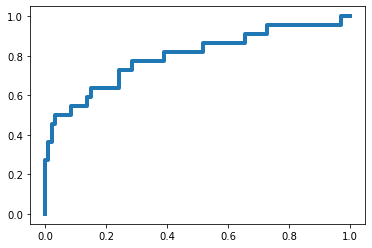

In [20]:
from matplotlib import pyplot
Y_probs = log_regression.predict_proba(X_validation)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_validation, Y_probs)
pyplot.plot(fpr, tpr, linewidth=4)
plt.show()


In [21]:
metrics.roc_auc_score(y_validation, Y_probs)


0.7959671907040328

In [22]:
logm = LogisticRegression(max_iter=2000)
# Fit a logistic regression with vector Y as dependent and matrix X as independent
logm.fit(X_train, y_train.values.ravel())
print(logm.intercept_)
print(logm.coef_)


[2.24551329]
[[-0.03494513  0.12471321 -0.08179898  0.56354484  0.01752963  0.20922973
   0.30961379 -0.44558212  0.46288275  0.10446664 -0.33242648 -0.32148583
  -0.06466713 -0.47640368  1.10660565  0.09730655  0.06087582  0.22119995
   1.85313707 -0.0234187  -0.40324799 -0.04861642  0.16588063 -0.11421648
  -0.04613693 -0.36142391  0.08527324 -0.24228198  0.1608428  -0.03115599]]


In [23]:
chosen_threshold = np.min(thresholds[thresholds > 0.1355])
print(chosen_threshold)
threshold_idx = np.where(thresholds == chosen_threshold)[0][0]
print(threshold_idx)


0.17927614294861174
18


In [24]:
Y_pred = np.where(Y_probs > chosen_threshold, 1, 0)
Y_pred


array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1])

In [25]:
cm = confusion_matrix(y_validation, Y_pred)
print(cm)


[[95 38]
 [ 6 16]]


In [26]:
# Taking the new dataset (preprocess)
lyon_census = pd.read_csv("employee_census_lyon.csv")
lyon_census


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,...,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,...,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,...,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,...,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,...,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,Travel_Frequently,430.0,Sales,7.0,3,Medical,1,1477,4,...,1,80,2,5,2,3,4,3,0,3
437,27.0,Non-Travel,210.0,Sales,1.0,1,Marketing,1,449,3,...,4,80,1,6,0,3,5,4,1,4
438,NaN,Travel_Rarely,1157.0,Research & Development,2.0,4,Medical,1,440,1,...,4,80,0,5,4,2,3,2,2,2
439,39.0,Travel_Rarely,1383.0,Human Resources,2.0,3,Life Sciences,1,909,4,...,3,80,2,13,2,3,5,4,0,4


In [27]:
lyon_census.isna().any()

Age                          True
BusinessTravel               True
DailyRate                    True
Department                  False
DistanceFromHome             True
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus                True
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalanc

In [28]:
lyon_census = lyon_census.dropna(axis=0, how='any')
lyon_census = lyon_census.reset_index()


In [29]:
lyon_census.duplicated().any()

False

In [30]:
lyon_census.nunique()
unique = [i for i in list(lyon_census) if lyon_census[i].nunique() <= 1]
lyon_census = lyon_census.drop(columns=unique)


In [31]:
gender = {'Male': 1, 'Female': 0}
overtime = {'Yes': 1, 'No': 0}
lyon_census.Gender = [gender[item] for item in lyon_census.Gender]
lyon_census.OverTime = [overtime[item] for item in lyon_census.OverTime]


In [32]:
catcols1 = lyon_census[['BusinessTravel', 'Department','EducationField', 'JobRole', 'MaritalStatus']]
encoder = OrdinalEncoder()
dfnew1 = encoder.fit_transform(catcols1)  # transform data
lyon_census_new = pd.DataFrame(data=dfnew1)


In [33]:
lyon_census_new.columns = ['BusinessTravel', 'Department','EducationField', 'JobRole', 'MaritalStatus']
lyon_census[['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']] = lyon_census_new[['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']]


In [34]:
lyon_census[['MonthlyIncome', 'MonthlyRate', 'DailyRate', 'HourlyRate', 'PercentSalaryHike']] = StandardScaler().fit_transform(lyon_census[['MonthlyIncome', 'MonthlyRate', 'DailyRate', 'HourlyRate', 'PercentSalaryHike']])


In [35]:
lyon = lyon_census.drop(['EmployeeNumber','index'], axis=1)


In [36]:
X_end = X_train.append(X_validation)
y_end = y_train.append(y_validation)


In [37]:
log = log_regression.fit(X_end, y_end)
y_pred_prob = logm.predict_proba(lyon)[:, 1]

t = 0.1795

y_test_pred = np.where(y_pred_prob > t,1,0)


In [38]:
lyon_att = pd.DataFrame(y_test_pred)
first_column = lyon_census.pop('EmployeeNumber')
lyon_att.insert(0,'EmployeeNumber',first_column)


In [39]:
probability = pd.DataFrame(y_pred_prob)
probability.columns = ['probab']
B = probability.pop('probab')
lyon_att.insert(2, 'probab', B)
lyon_att.columns.values[1] = "Attrition"


In [40]:
lyon_att[['Department', 'JobRole']] = catcols1[['Department', 'JobRole']]
lyon_att['JobLevel'] = lyon_census['JobLevel']
lyon_att

,EmployeeNumber,Attrition,probab,Department,JobRole,JobLevel
0,250,0,0.012069,Research & Development,Manufacturing Director,2
1,1714,0,0.090100,Human Resources,Human Resources,1
2,86,0,0.004255,Research & Development,Research Scientist,3
3,666,1,0.243711,Sales,Sales Representative,1
4,302,0,0.084831,Sales,Sales Executive,3
...,...,...,...,...,...,...
319,2055,0,0.116962,Sales,Sales Executive,3
320,170,0,0.024655,Research & Development,Manufacturing Director,2
321,1477,0,0.128810,Sales,Sales Executive,2
322,449,1,0.276204,Sales,Sales Executive,2


In [41]:
lyon_att.loc[(lyon_att['Department'] == "Human Resources")& (lyon_att['Attrition'] == 1)]


,EmployeeNumber,Attrition,probab,Department,JobRole,JobLevel
96,566,1,0.579056,Human Resources,Human Resources,1
145,1419,1,0.203475,Human Resources,Human Resources,3
229,1049,1,0.262457,Human Resources,Human Resources,1


In [43]:
classifier_LR = LogisticRegression(max_iter=2000)
classifier_LR.fit(X_train, y_train.values.ravel())


LogisticRegression(max_iter=2000)

In [44]:
summary = pd.DataFrame([X_train.columns, classifier_LR.coef_[
                       0]]).T.sort_values(by=1, ascending=False)
summary.columns = ['Variable', 'Coefficient']
summary.head(n=5)


,Variable,Coefficient
18,OverTime,1.853137
14,MaritalStatus,1.106606
3,Department,0.563545
8,Gender,0.462883
6,EducationField,0.309614


##### 3. The optimization problem here Is to target employee categories instead of targeting employees directly, the aim is to develop an optimization model which makes sure to select the employees on category level as to make the target number of employees leave from the company, the condition being that the employees leaving must be equally distributed among the departments, sizing down the departments to the minimum requirement which is 80%. 

##### The key elements of the optimization model are as follows: 

##### Decision Variables: 

##### The decision variables here are the groups to which the RCC must be offered or not.  

##### Constraints: 

##### The Average amount gained from salary cuts > expected savings 

##### Average number of employees leaving >= management expectations 

##### People on each department == 80% of each department 

##### Objective: 

##### The objective of the model is to minimize the total amount spent of severance packages. 

### 4.
### The employee categories are divided based on three coefficents that are Performance rating, overtime and Years since last promotion.
### the coefficent over time was found to be the most significant and years since last promotion is taken into account as the employees who havnt been promoted  because of performance might be more likely to accept the offer.


### 5.
##### severance Cost of employee is been working for 10 years or above: (Years)*(1/3)*(Monthly Income)+2(Monthly Income).
##### severance Cost of employee is been working for less than 10 years: (Years)*(1/4)*(Monthly Income)+2(Monthly Income).


### 6.
##### Groups 2,4,6,7,8 are recommended to be open to the RCC's
##### Total severance cost acheived = 1135277.868 euros

### 7.
#### The decision variables now change the groups which are to be offered the RCC.
#### The objective that is severance cost is minimized as required

### 8.
##### This is ensured by calculating the number of famale and male employees offered the RCC's and also gender was not taken into consideration while determining the groups.

### 9.
##### The pros of this optimization approach is that the objective is staisfied as per requirement i.e to minimize the severance cost  while the expected savings requirement being met, also all the constraints given are satisfied.
#### The consequences of this optimization model is that the it might be proved infeasible when a large amount of data is considered.

#### The assumptions that are being made implicitly are that the employees with overtime and having a performance rating might not leave and the ones who are not promoted in the last two years might accept an RCC if offered. These are most likely to be fuilfilled with this optimization approach